In [1]:
# Set number of desirable positions in society
k = 3

# TODO: Initialize the k competitions + a base state --- assume this to be any dataset

# Set prevalences for each competition --- "contest chances"
# This is overall for the entire population
# To model the "desirability of competitions" competition prevalences should be monotonically decreasing,
# ie. competitions should get harder as positions get more desirable.

competition_names = ['school', 'college', 'job']
prevalences = [0.7, 0.4, 0.15]

In [2]:
from DataGenerator import initialize_base_population
from Competition import GenericCompetition
from utils.common_helpers import set_protected_groups
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
base_model = initialize_base_population()
base_population = base_model.simulate(n_samples=2000, seed=42)

  0%|          | 0/6 [00:00<?, ?it/s]

In [4]:
C1 = GenericCompetition(base_population, ['G', 'SES'], [1,1])

In [5]:
k_1 = round(prevalences[0]*base_population.shape[0])
k_1

1400

In [6]:
def score_based_set_selection(df, var_names, coeffs, k, target_name):
    df['selected'] = df.apply(lambda row : coeffs[0]*row[var_names[0]] + coeffs[1]*row[var_names[1]] + coeffs[2]*row[var_names[2]] + coeffs[3]*row[var_names[3]], axis=1)

    #df['school'] = df.apply(linear__, axis=1)
    #df['school'] = (X1_coef*df['X1']) + (X2_coef*df['X2']) + (X3_coef*['X3']) + (Y1_coef*df['Y1'])
    df[target_name] = 0
    selected = df.sort_values(by=['selected', 'Z1', 'X3'], ascending=False)[:k]

    df.loc[selected.index, target_name] = 1
    #df[target_name].loc[selected.index] = 1
    df.drop(columns=['selected'], inplace=True)

    return df

In [7]:
selected_df = score_based_set_selection(base_population, ['X1', 'X2', 'X3', 'Z1'],[1, 1, 2, 1], k_1, 'Y1')
C1.compute_metrics(selected_df, 'Y1', 1)

,metric_name,group_name,metric_values
0,prevalence,G_priv_SES_priv,0.970464
1,prevalence,G_priv_SES_dis,0.859852
2,prevalence,G_dis_SES_priv,0.795181
3,prevalence,G_dis_SES_dis,0.342593
4,prevalence,G_priv,0.881956
5,prevalence,G_dis,0.434889
6,prevalence,SES_priv,0.898263
7,prevalence,SES_dis,0.649969
8,selection_rate,G_priv_SES_priv,1.386377
9,selection_rate,G_priv_SES_dis,1.228361


In [8]:
c1_population = C1.selected

In [9]:
pos_idx = c1_population[c1_population.Y1 == 1].index
neg_idx = c1_population[c1_population.Y1 != 1].index

Z2_1 = 10*np.random.beta(a=2, b=2, size=len(pos_idx))
Z2_0 = 10*np.random.beta(a=2, b=5, size=len(neg_idx))
c1_population["Z2"] = 0

c1_population.loc[pos_idx, "Z2"] = Z2_1
c1_population.loc[neg_idx, "Z2"] = Z2_0


In [10]:
c1_population

,SES,X3,X1,X2,G,Z1,Y1,Z2
0,0,1,0,0,0,0,1,3.314357
1,1,1,1,0,0,1,1,6.250479
2,0,1,0,1,1,1,1,5.776867
3,0,0,0,0,0,0,0,1.792291
4,0,0,0,0,0,0,0,5.210868
...,...,...,...,...,...,...,...,...
1995,0,1,1,1,1,1,1,7.371780
1996,1,0,1,0,0,0,0,3.001866
1997,0,0,0,1,0,1,1,5.253866
1998,0,0,1,1,1,1,1,6.411596


In [11]:
C2 = GenericCompetition(c1_population, ['G', 'SES'], [1,1])
k_2 = round(prevalences[1]*c1_population.shape[0])
k_2, prevalences[1]

(800, 0.4)

In [12]:
C2.applicant_pool.columns

Index(['SES', 'X3', 'X1', 'X2', 'G', 'Z1', 'Y1', 'Z2'], dtype='object')

In [13]:
selected_c2 = score_based_set_selection(C2.applicant_pool, ['X1', 'X2', 'X3', 'Z2'],[1, 1, 2, 1], k_2, 'Y2')
C2.compute_metrics(selected_c2, 'Y2', 1)

,metric_name,group_name,metric_values
0,prevalence,G_priv_SES_priv,0.704641
1,prevalence,G_priv_SES_dis,0.488936
2,prevalence,G_dis_SES_priv,0.439759
3,prevalence,G_dis_SES_dis,0.148148
4,prevalence,G_priv,0.532040
5,prevalence,G_dis,0.207617
6,prevalence,SES_priv,0.595533
7,prevalence,SES_dis,0.350657
8,selection_rate,G_priv_SES_priv,1.761603
9,selection_rate,G_priv_SES_dis,1.222339


In [14]:
C2.selected

,SES,X3,X1,X2,G,Z1,Y1,Z2,Y2
0,0,1,0,0,0,0,1,3.314357,0
1,1,1,1,0,0,1,1,6.250479,1
2,0,1,0,1,1,1,1,5.776867,1
3,0,0,0,0,0,0,0,1.792291,0
4,0,0,0,0,0,0,0,5.210868,0
...,...,...,...,...,...,...,...,...,...
1995,0,1,1,1,1,1,1,7.371780,1
1996,1,0,1,0,0,0,0,3.001866,0
1997,0,0,0,1,0,1,1,5.253866,0
1998,0,0,1,1,1,1,1,6.411596,1


In [15]:
c2_population = C2.selected

pos_idx = c2_population[c2_population.Y2 == 1].index
neg_idx = c2_population[c2_population.Y2 != 1].index

Z3_1 = 10*np.random.beta(a=2, b=2, size=len(pos_idx))
Z3_0 = 10*np.random.beta(a=2, b=5, size=len(neg_idx))
c1_population["Z3"] = 0

c2_population.loc[pos_idx, "Z3"] = Z3_1
c2_population.loc[neg_idx, "Z3"] = Z3_0


In [16]:
C3 = GenericCompetition(c2_population, ['G', 'SES'], [1,1])
k_3 = round(prevalences[2]*c2_population.shape[0])
k_3, prevalences[2]

(300, 0.15)

In [17]:
C3.applicant_pool.columns

Index(['SES', 'X3', 'X1', 'X2', 'G', 'Z1', 'Y1', 'Z2', 'Y2', 'Z3'], dtype='object')

In [18]:
selected_c3 = score_based_set_selection(C3.applicant_pool, ['X3','Z1','Z2','Z3'],[2, 1, 1, 2], k_3, 'Y3')
C3.compute_metrics(selected_c3, 'Y3', 1)

,metric_name,group_name,metric_values
0,prevalence,G_priv_SES_priv,0.248945
1,prevalence,G_priv_SES_dis,0.186512
2,prevalence,G_dis_SES_priv,0.132530
3,prevalence,G_dis_SES_dis,0.064815
4,prevalence,G_priv,0.198988
5,prevalence,G_dis,0.078624
6,prevalence,SES_priv,0.200993
7,prevalence,SES_dis,0.137132
8,selection_rate,G_priv_SES_priv,1.659634
9,selection_rate,G_priv_SES_dis,1.243414


In [19]:
competition_list = {
    "school" : C1,
    "college" : C2,
    "job": C3
}

In [20]:
res_df = None
for competition_name in competition_list.keys():
    temp_result = competition_list[competition_name].metrics
    temp_result['competition'] = [competition_name]*len(temp_result)

    if res_df is None:
        res_df = temp_result
    else:
        res_df = pd.concat([res_df, temp_result], ignore_index=True)

In [21]:
prevalences

[0.7, 0.4, 0.15]

In [27]:
res_df[res_df['metric_name']== 'prevalence']

,metric_name,group_name,metric_values,competition
0,prevalence,G_priv_SES_priv,0.970464,school
1,prevalence,G_priv_SES_dis,0.859852,school
2,prevalence,G_dis_SES_priv,0.795181,school
3,prevalence,G_dis_SES_dis,0.342593,school
4,prevalence,G_priv,0.881956,school
5,prevalence,G_dis,0.434889,school
6,prevalence,SES_priv,0.898263,school
7,prevalence,SES_dis,0.649969,school
16,prevalence,G_priv_SES_priv,0.704641,college
17,prevalence,G_priv_SES_dis,0.488936,college


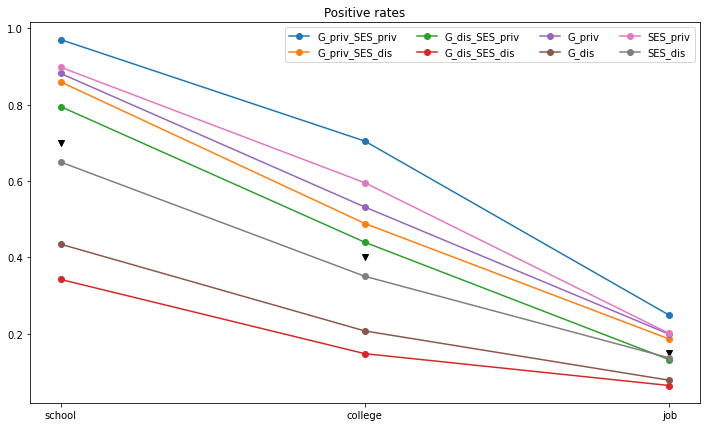

In [22]:
plt.figure(figsize=(12,7))

xx = list(competition_list.keys())
for group_ in C1.social_groups.keys():
    yy = res_df[(res_df.metric_name == 'prevalence') & (res_df.group_name == group_)]['metric_values']
    plt.plot(xx, yy, marker='o', label=group_)

plt.scatter(xx, prevalences, marker='v', c='black')
plt.title("Positive rates")
plt.legend(ncol=4)
plt.show()

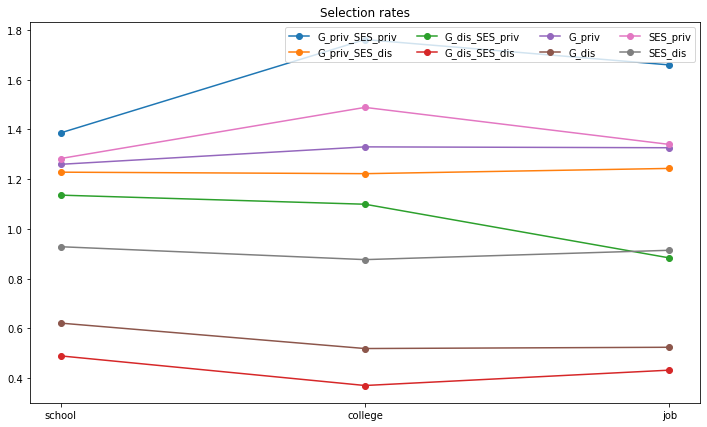

In [23]:
plt.figure(figsize=(12,7))

xx = list(competition_list.keys())
for group_ in C1.social_groups.keys():
    yy = res_df[(res_df.metric_name == 'selection_rate') & (res_df.group_name == group_)]['metric_values']
    plt.plot(xx, yy, marker='o', label=group_)

#plt.scatter(xx, prevalences, marker='v' ,c='black')
plt.title("Selection rates")
plt.legend(ncol=4)
plt.show()